In [52]:
import numpy as np 
import xarray as xr 
from scipy import interpolate
import matplotlib.pyplot as plt
from thermal.utils import surface_AirTemp

def clavo_greeve_PDDs(T, σ=0.0):
    import scipy.special as sp

    with np.errstate(divide='ignore', invalid='ignore'):
        T_norm = T / (np.sqrt(2)*σ)

    clavo_greeve = σ / np.sqrt(2*np.pi) * np.exp(-T_norm**2) + T/2*sp.erfc(-T_norm)

    return clavo_greeve

Load the zero net-balance simulations for the Kaskawulsh. 

In [6]:
KMR_ds = xr.open_dataset('../../../input_data/mass_balance/Kaskawulsh_NetBalance.nc')

Load the spline knots and coefficents used to force the `Elmer` simulations. 

In [15]:
# load the data from disk
c = np.loadtxt('../../../input_data/mass_balance/KMR_MB_k_2_s_2500_coefs.dat')
t = np.loadtxt('../../../input_data/mass_balance/KMR_MB_k_2_s_2500_knots.dat')
# pack all the data into a tuple, in the same format spprep wouls create
tck = (t,c,2)

In [68]:
# hypothetical elevation vector, spanning Glacier 12's elevation range
z = np.linspace(1800, 2800, 200)
# polynomial coefficents for the air temp std. fir 
p = (8.29376332e-05, -3.45256005e-02, 6.31076200e+00)
# day of year vector 
doy = np.linspace(1,365,365)[:, None]
# standard deviation in the daily air temperatures
sigma = np.polyval(p, doy)

In [161]:
b = interpolate.splev(z, tck)

m_min = clavo_greeve_PDDs(T,   sigma).sum(0)*0.006 #45
m_ref = clavo_greeve_PDDs(T+.5,sigma).sum(0)*0.006
m_max = clavo_greeve_PDDs(T+1.,sigma).sum(0)*0.006

(0.0, 4.0)

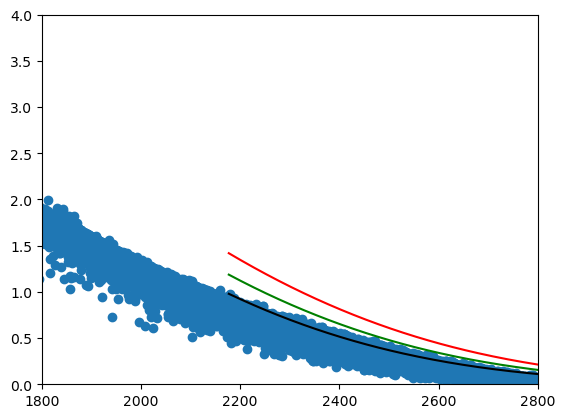

In [162]:
plt.scatter(KMR_ds.Z, KMR_ds.M)

plt.plot(z, (lambda x, y : np.where(x>0,y, np.nan))(b,m_min), c='k')
plt.plot(z, (lambda x, y : np.where(x>0,y, np.nan))(b,m_ref), c='g')
plt.plot(z, (lambda x, y : np.where(x>0,y, np.nan))(b,m_max), c='r')

plt.xlim(z[0], z[-1])
plt.ylim(0, 4)

(1800.0, 2800.0)

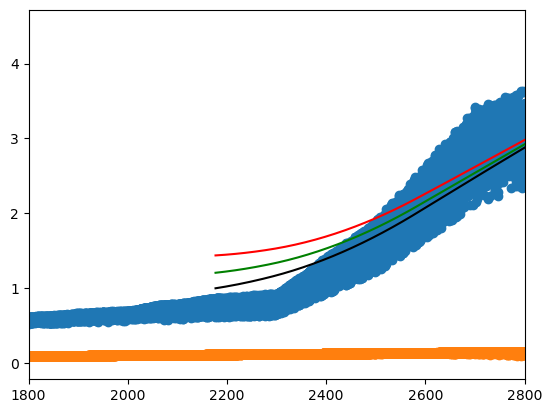

In [140]:
plt.scatter(KMR_ds.Z, KMR_ds.A)
plt.scatter(KMR_ds.Z, KMR_ds.R)

plt.plot(z, (lambda x, y : np.where(x>0,x+y, np.nan))(b,m_min), c='k')
plt.plot(z, (lambda x, y : np.where(x>0,x+y, np.nan))(b,m_ref), c='g')
plt.plot(z, (lambda x, y : np.where(x>0,x+y, np.nan))(b,m_max), c='r')

plt.xlim(z[0], z[-1])

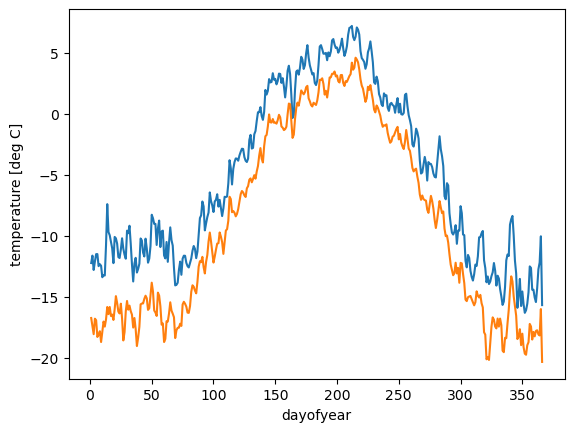

In [148]:
(KMR_ds['Temp-GWA'].groupby('time.dayofyear').mean() + KMR_ds['Temp-GWA'].groupby('time.dayofyear').std()).plot()
KMR_ds['Temp-GWA'].groupby('time.dayofyear').mean().plot()

In [153]:
KMR_ds['Temp-GWA'].time.

<xarray.DataArray 'time' (time: 4383)>
array(['2007-01-01T00:00:00.000000000', '2007-01-02T00:00:00.000000000',
       '2007-01-03T00:00:00.000000000', ..., '2018-12-29T00:00:00.000000000',
       '2018-12-30T00:00:00.000000000', '2018-12-31T00:00:00.000000000'],
      dtype='datetime64[ns]')
Coordinates:
  * time     (time) datetime64[ns] 2007-01-01 2007-01-02 ... 2018-12-31